In [32]:
%%writefile water.input.lammps

units real
dimension 3
# boundary p p p 
atom_style full
bond_style harmonic
angle_style harmonic
dihedral_style harmonic

pair_style lj/cut/coul/long 10
kspace_style pppm 1.0e-5
special_bonds lj 0.0 0.0 0.5 coul 0.0 0.0 1.0 angle yes     

region simulation_cell block -45 45 -15 15 -15 15
create_box 9 simulation_cell bond/types 7 angle/types 8 dihedral/types 4 extra/bond/per/atom 3 extra/angle/per/atom 6 extra/dihedral/per/atom 10  extra/special/per/atom 14

include PARM_PEG_in_water.lammps

molecule watermol water.topo.SCPFw.input
create_atoms 0 random 1050 297428 NULL mol watermol 293298 overlap 1.0 maxtry 50

group H2O type 8 9 
minimize 1.0e-4 1.0e-6 100 1000
reset_timestep 0

fix mynpt all npt temp 300 300 100 iso 1 1 1000 

dump mydump all atom 1000 dump.lammpstrj
variable mytemp equal temp
variable myvol equal vol
fix myat1 all ave/time 10 10 100 v_mytemp file water.temperature.dat
fix myat2 all ave/time 10 10 100 v_myvol file water.volume.dat

variable myoxy equal count(H2O)/3
variable density equal ${myoxy}/v_myvol
fix myat3 all ave/time 10 10 100 v_density file water.density.dat

thermo 1000
timestep 1.0
run 500000 #20ps

write_data H2O_equilibriated.data

Overwriting water.input.lammps


In [33]:
%%writefile water.topo.SCPFw.input

3 atoms
2 bonds
1 angles

Coords

1 0 0 0
2 1.012 0 0
3 -0.4 0.929 0

Types

1 8
2 9 
3 9

Charges

1 -0.82
2 0.41
3 0.41

Bonds

1 7 1 2
2 7 1 3

Angles

1 8 2 1 3

Overwriting water.topo.SCPFw.input


In [35]:
! lmp -in water.input.lammps

^C


In [7]:
import glob
import matplotlib.pyplot as plt

glob.glob("*.dat")

['water.density.dat', 'water.temperature.dat', 'water.volume.dat']

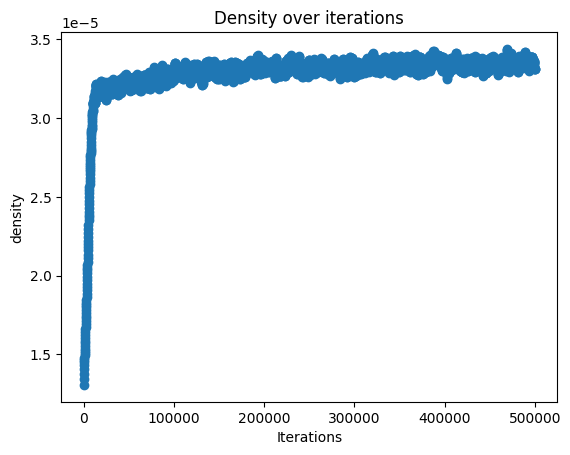

In [8]:
extract_data_x = []
extract_data_y = []

file = glob.glob("*.dat")[0]
with open(file) as f:
    for line in f:
        if '#' not in line:
            extract_data_x.append(float(line.replace("\n","").split(' ')[0]))
            extract_data_y.append(float(line.replace("\n","").split(' ')[1])/1000)

plt.plot(extract_data_x,extract_data_y,'-o')
plt.xlabel("Iterations")
plt.ylabel("density")
plt.title("Density over iterations")
plt.show()

In [5]:
! lmp -sf gpu -pk gpu 1 -in water.input.lammps


LAMMPS (27 Jun 2024)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from C:\Users\aravs\AppData\Local\LAMMPS 64-bit 27Jun2024\plugins
Created orthogonal box = (-45 -15 -15) to (45 15 15)
  1 by 1 by 1 MPI processor grid
Read molecule template watermol:
(no title)
  1 molecules
  0 fragments
  3 atoms with max type 9
  2 bonds with max type 7
  1 angles with max type 8
  0 dihedrals with max type 0
  0 impropers with max type 0
Created 3150 atoms
  using lattice units in orthogonal box = (-45 -15 -15) to (45 15 15)
  create_atoms CPU = 0.084 seconds
3150 atoms in group H2O

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Your simulation uses code contributions which should be cited:
- GPU package (short-range, long-range and three-body potentials): doi:10.1016/j.cpc.2010.12.021, doi:10.1016/j.cpc.2011.10.012, doi:10.1016/j.cpc.2013.08.002, doi:10.1016/j.commatsci.2014.10.068, do

In [11]:
%%writefile peg.input.lammps

units real 
atom_style full
bond_style harmonic
angle_style harmonic
dihedral_style harmonic
pair_style lj/cut/coul/long 10 
kspace_style pppm 1e-5
special_bonds lj 0.0 0.0 0.5 coul 0.0 0.0 1.0 angle yes dihedral yes

read_data H2O_equilibriated.data extra/bond/per/atom 3 extra/angle/per/atom 6 extra/dihedral/per/atom 10 extra/special/per/atom 14 
include PARM_PEG_in_water.lammps

molecule pegmol PEG-GROMOS.mol
create_atoms 0 single 0 0 0 mol pegmol 294828

group H2O type 8 9
group PEG type 1 2 3 4 5 6 7

delete_atoms overlap 2.0 H2O PEG mol yes

fix mynpt all npt temp 300 300 100 x 1 1 1000 
timestep 1.0

dump mydump all atom 100 peg_in_equilibriated_water.dump.lammpstrj

thermo 100 
variable mytemp equal temp
variable myvol equal vol

fix myat1 all ave/time 10 10 100 v_mytemp file peginequilibriatedwatertemp.dat
fix myat2 all ave/time 10 10 100 v_myvol file peginequilibriatedwatervol.dat

variable myenthalpy equal enthalpy
fix myat3 all ave/time 10 10 100 v_myenthalpy file peginequilibriatedwaterenthalpy.dat

run 30000
write_data peginequilibriatedwaterrun.data

Overwriting peg.input.lammps


In [12]:
! lmp -sf gpu -pk gpu 1 -in peg.input.lammps

LAMMPS (27 Jun 2024)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from C:\Users\aravs\AppData\Local\LAMMPS 64-bit 27Jun2024\plugins
Reading data file ...
  orthogonal box = (-32.915097 -10.971699 -10.971699) to (32.915097 10.971699 10.971699)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  3150 atoms
  reading velocities ...
  3150 velocities
  scanning bonds ...
  5 = max bonds/atom
  scanning angles ...
  7 = max angles/atom
  orthogonal box = (-32.915097 -10.971699 -10.971699) to (32.915097 10.971699 10.971699)
  1 by 1 by 1 MPI processor grid
  reading bonds ...
  2100 bonds
  reading angles ...
  1050 angles
Finding 1-2 1-3 1-4 neighbors ...
  special bond factors lj:    0        0        0.5     
  special bond factors coul:  0        0        1       
     2 = max # of 1-2 neighbors
     1 = max # of 1-3 neighbors
     1 = max # of 1-4 neighbors
  2100 = # of 1-3 neighbors before

In [19]:
%%writefile force.peg.water.input.lammps

variable f0 equal 5

units real 
atom_style full
bond_style harmonic
angle_style harmonic
dihedral_style harmonic
pair_style lj/cut/coul/long 10 
kspace_style pppm 1e-5

special_bonds lj 0.0 0.0 0.5 coul 0.0 0.0 1.0 angle yes dihedral yes

read_data peginequilibriatedwaterrun.data
include PARM_PEG_in_water.lammps

group H2O type 8 9
group PEG type 1 2 3 4 5 6 7
group topull1 type 6
group topull2 type 7

dump mydump all atom 1000 force.peg.water.dump.lammpstrj

timestep 1.0
fix mynvt all nvt temp 300 300 100

variable mytemp equal temp

fix myat1 all ave/time 10 10 100 v_mytemp file forcepeginwatertemp.dat

variable x1 equal xcm(topull1,x)
variable x2 equal xcm(topull2,x)
variable y1 equal xcm(topull1,y)
variable y2 equal xcm(topull2,y)
variable z1 equal xcm(topull1,z)
variable z2 equal xcm(topull2,z)

variable delta_r equal sqrt((v_x1-v_x2)^2+(v_y1-v_y2)^2+(v_z1-v_z2)^2)
fix myat2 all ave/time 10 10 100 v_delta_r file deltarforcepeginwater.dat

compute rgyr PEG gyration

fix myat3 all ave/time 10 10 100 c_rgyr file gyrationradiuspeginwater.dat
compute myrdf all rdf 200 1 8 2 8 cutoff 10 

fix myat4 all ave/time 10 10 100 c_myrdf[*] file rdfbeforeforce.dat mode vector

thermo 1000 

run 30000

fix myfrc1 topull1 addforce ${f0} 0 0 
fix myfrc2 topull2 addforce -${f0} 0 0 
compute myrdf2 all rdf 200 1 8 2 8 cutoff 10 

fix myat5 all ave/time 10 10 100 c_myrdf2[*] file rdfafterforce.dat mode vector

run 30000

Overwriting force.peg.water.input.lammps


In [20]:
! lmp -sf gpu -pk gpu 1 -in force.peg.water.input.lammps

LAMMPS (27 Jun 2024)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from C:\Users\aravs\AppData\Local\LAMMPS 64-bit 27Jun2024\plugins
Reading data file ...
  orthogonal box = (-31.579047 -10.971699 -10.971699) to (31.579047 10.971699 10.971699)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  3086 atoms
  reading velocities ...
  3086 velocities
  scanning bonds ...
  3 = max bonds/atom
  scanning angles ...
  6 = max angles/atom
  scanning dihedrals ...
  9 = max dihedrals/atom
  orthogonal box = (-31.579047 -10.971699 -10.971699) to (31.579047 10.971699 10.971699)
  1 by 1 by 1 MPI processor grid
  reading bonds ...
  2090 bonds
  reading angles ...
  1178 angles
  reading dihedrals ...
  210 dihedrals
Finding 1-2 1-3 1-4 neighbors ...
  special bond factors lj:    0        0        0.5     
  special bond factors coul:  0        0        1       
     4 = max # of 1-2 neighbors
     6 =

In [47]:
%%writefile force.peg.ionic.water.input.lammps


units real 
atom_style full
bond_style harmonic
angle_style harmonic
dihedral_style harmonic
pair_style lj/cut/coul/long 10
kspace_style pppm 1e-5

special_bonds lj 0.0 0.0 0.5 coul 0.0 0.0 1.0

read_data mix-with-salt.data
include PARM-with-salt.lammps

create_atoms 10 random 20 387183 NULL overlap 0.5 maxtry 50
create_atoms 11 random 20 209422 NULL overlap 0.5 maxtry 50 

group H2O type 8 9
group PEG type 1 2 3 4 5 6 7 
group ions type 10 11

set type 10 charge 1
set type 11 charge -1

minimize 1e-4 1e-6 100 1000 
reset_timestep 0

fix mynpt all npt temp 300 300 100 iso 1 1 1000 
fix myrct PEG recenter INIT INIT INIT

timestep 1.0

thermo 5000
dump mydump all atom 1000 ion.water.peg.dump.lammpstrj

run 50000


Overwriting force.peg.ionic.water.input.lammps


In [48]:
%%writefile ions.input

2 atoms

Coords

1 0.0 0.5 0.9
2 0.1 0.0 0.1

Types

1 10
2 11

Charges

1 -1.0
2 1.0


Overwriting ions.input


In [49]:
%%writefile PARM_ionic.input

mass 1 15.9994 # PEG O (GROMOS 54A7)
mass 2 12.011 # PEG C (GROMOS 54A7)
mass 3 1.008 # PEG H (GROMOS 54A7)
mass 4 1.008 # PEG H (GROMOS 54A7)
mass 5 12.011 # PEG C (GROMOS 54A7)
mass 6 15.9994 # PEG O (GROMOS 54A7)
mass 7 15.9994 # PEG O (GROMOS 54A7)
mass 8 15.9994 # H2O O (SPC/Fw)
mass 9 1.008 # H2O H (SPC/Fw)
mass 10 22.98 # Na
mass 11 35.453 # Cl 

pair_coeff 1 1 0.2526 2.8492 # PEG O (GROMOS 54A7)
pair_coeff 2 2 0.0663 3.5812 # PEG C (GROMOS 54A7)
pair_coeff 3 3 0.0283 2.3734 # PEG H (GROMOS 54A7)
pair_coeff 4 4 0.0 0.0 # PEG H (GROMOS 54A7)
pair_coeff 5 5 0.2450 2.8114 # PEG C (GROMOS 54A7)
pair_coeff 6 6 0.1195 3.1000 # PEG O (GROMOS 54A7)
pair_coeff 7 7 0.1195 3.1000 # PEG O (GROMOS 54A7)
pair_coeff 8 8 0.155 3.165  # H2O O (SPC/Fw)
pair_coeff 9 9 0.0 0.0 # H2O H (SPC/Fw)
pair_coeff 10 10 .0469 .243 # Na
pair_coeff 11 11 .15 .4045 # Cl

bond_coeff 1 1109.2926 1.12 
bond_coeff 2 399.7916 1.43 
bond_coeff 3 299.8440 1.52 
bond_coeff 4 400.0343 1.53 
bond_coeff 5 310.7075 1.41 
bond_coeff 6 179.2543 0.971 
bond_coeff 7 529.581 1.012 # H2O O-H (SPC/Fw)

angle_coeff 1 47.6940 109.5 
angle_coeff 2 55.1271 109.5 
angle_coeff 3 47.6350 109.6 
angle_coeff 4 55.1139 111.0 
angle_coeff 5 54.9931 110.3 
angle_coeff 6 180.4602 109.0 
angle_coeff 7 30.1731 110.0 
angle_coeff 8 37.95 113.24 # H2O H-O-H (SPC/Fw)

dihedral_coeff 1 0.3011 1 3 
dihedral_coeff 2 1.4149 1 3 
dihedral_coeff 3 0.2390 -1 3 
dihedral_coeff 4 0.0 1 1

Overwriting PARM_ionic.input


In [50]:
! lmp -sf gpu -pk gpu 1 -in force.peg.ionic.water.input.lammps

LAMMPS (27 Jun 2024)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from C:\Users\aravs\AppData\Local\LAMMPS 64-bit 27Jun2024\plugins
Reading data file ...
  orthogonal box = (-11.857424 -12.128791 -12.128791) to (60.372587 12.128791 12.128791)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  3146 atoms
  reading velocities ...
  3146 velocities
  scanning bonds ...
  3 = max bonds/atom
  scanning angles ...
  6 = max angles/atom
  scanning dihedrals ...
  9 = max dihedrals/atom
  orthogonal box = (-11.857424 -12.128791 -12.128791) to (60.372587 12.128791 12.128791)
  1 by 1 by 1 MPI processor grid
  reading bonds ...
  2130 bonds
  reading angles ...
  1198 angles
  reading dihedrals ...
  210 dihedrals
Finding 1-2 1-3 1-4 neighbors ...
  special bond factors lj:    0        0        0.5     
  special bond factors coul:  0        0        1       
     4 = max # of 1-2 neighbors
     6 =

In [14]:
%%writefile nanosheared.input.lammps

boundary p p f
units real
atom_style full
bond_style harmonic
angle_style harmonic
pair_style lj/cut/tip4p/long 1 2 1 1 0.1546 12.0
kspace_style pppm/tip4p 1.0e-4
kspace_modify slab 3.0

lattice fcc 4.04
region box block -3 3 -3 3 -5 5
create_box 5 box bond/types 1 angle/types 1 extra/bond/per/atom 2 extra/angle/per/atom 1 extra/special/per/atom 2

region rbotwall block -3 3 -3 3 -4 -3
region rtopwall block -3 3 -3 3 3 4
region rwall union 2 rbotwall rtopwall

create_atoms 5 region rwall

region rliquid block INF INF INF INF -2 2
molecule h2omol rigidwater.input

create_atoms 0 region rliquid mol h2omol 298329

create_atoms 3 random 15 20842 rliquid overlap 0.3 maxtry 500
create_atoms 4 random 15 98493 rliquid overlap 0.3 maxtry 500

set type 3 charge 1
set type 4 charge -1

include parameter.nanosheared.lammps
include group.lammps

delete_atoms random fraction 0.15 yes H2O NULL 2942889 mol yes

run 0

write_data system.nanosheared.data nocoeff
write_dump all atom dump.lammpstrj

Overwriting nanosheared.input.lammps


In [15]:
! lmp -sf gpu -pk gpu 1 -in nanosheared.input.lammps

LAMMPS (27 Jun 2024)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from C:\Users\aravs\AppData\Local\LAMMPS 64-bit 27Jun2024\plugins
Lattice spacing in x,y,z = 4.04 4.04 4.04
Created orthogonal box = (-12.12 -12.12 -20.2) to (12.12 12.12 20.2)
  1 by 1 by 1 MPI processor grid
Created 432 atoms
  using lattice units in orthogonal box = (-12.12 -12.12 -20.2) to (12.12 12.12 20.2)
  create_atoms CPU = 0.002 seconds
Read molecule template h2omol:
(no title)
  1 molecules
  0 fragments
  3 atoms with max type 2
  2 bonds with max type 1
  1 angles with max type 1
  0 dihedrals with max type 0
  0 impropers with max type 0
Created 1944 atoms
  using lattice units in orthogonal box = (-12.12 -12.12 -20.2) to (12.12 12.12 20.2)
  create_atoms CPU = 0.001 seconds
Created 15 atoms
  using lattice units in orthogonal box = (-12.12 -12.12 -20.2) to (12.12 12.12 20.2)
  create_atoms CPU = 0.001 seconds
Crea

In [1]:
%%writefile rigidwater.input

# Water molecule.

3 atoms
2 bonds
1 angles

Coords

1    0 0 0
2    0.9584 0 0
3    -0.23996 0.92787 0

Types

1        1
2        2
3        2

Charges

1       -1.1128
2        0.5564
3        0.5564

Bonds

1   1      1      2
2   1      1      3

Angles

1   1      2      1      3

Shake Flags

1 1
2 1
3 1

Shake Atoms

1 1 2 3
2 1 2 3
3 1 2 3

Shake Bond Types

1 1 1 1
2 1 1 1
3 1 1 1

Special Bond Counts

1 2 0 0
2 1 1 0
3 1 1 0

Special Bonds

1 2 3
2 1 3
3 1 2

Writing rigidwater.input


In [11]:
%%writefile parameter.nanosheared.lammps

mass 1 15.9994
mass 2 1.008
mass 3 28.990
mass 4 35.453
mass 5 26.9815

pair_coeff 1 1 .185199 3.1589
pair_coeff 2 2 0.0 1.0
pair_coeff 3 3 0.04690 2.4299
pair_coeff 4 4 0.1500 4.04470
pair_coeff 5 5 11.697 2.574 
pair_coeff 1 5 0.4 2.86645

bond_coeff 1 0 0.9572

angle_coeff 1 0 104.52

Writing parameter.nanosheared.lammps


In [2]:
%%writefile group.lammps

group H2O type 1 2
group Na type 3
group Cl type 4
group ions union Na Cl
group fluid union H2O ions

group wall type 5
region rtop block INF INF INF INF 0 INF
region rbot block INF INF INF INF INF 0
group top region rtop
group bot region rbot

group walltop intersect wall top
group wallbot intersect wall bot 

Writing group.lammps


### Case Ipso

Make a water reservoir with FUS domain in it and study exactly the things studied in the PEG in water tutorial. This ought to teach us as to how to define a system of ionized aqueous solutions.

This is very helpful in the initial simulation of cell like systems. Introduction of more polymers and ion efflux and influx would make the system more realistic.